# BenchMark

Tests ``exp_conv_gau``, ``exp_conv_cauchy``, ``dmp_osc_conv_gau``, ``dmp_osc_conv_cauchy`` routine

In [1]:
import sys
import numpy as np
from scipy.signal import convolve
from TRXASprefitpack import gau_irf, cauchy_irf, exp_conv_gau, exp_conv_cauchy, dmp_osc_conv_gau, dmp_osc_conv_cauchy
import matplotlib.pyplot as plt

In [2]:
def decay(t, k):
    return np.exp(-k*t)*np.heaviside(t, 1)

def dmp_osc(t, k, T, phi):
    return np.exp(-k*t)*np.cos(2*np.pi*t/T+phi)*np.heaviside(t, 1)

## ``exp_conv_gau``

Test condition.

1. fwhm = 0.15, tau = 0.05, time range [-1, 1]

2. fwhm = 0.15, tau = 0.15, time range [-1, 1]

3. fwhm = 0.15, tau = 1.5, time range [-10, 10]
    

In [3]:
fwhm = 0.15
tau_1 = 0.05
tau_2 = 0.15
tau_3 = 1.5

t_1 = np.linspace(-0.3, 0.3, 2001)
t_2 = np.linspace(-1, 1, 2001)
t_3 = np.linspace(-10, 10, 2001)

# To test exp_conv_gau routine, calculates convolution numerically
gau_irf_1 = gau_irf(t_1, fwhm)
gau_irf_2 = gau_irf(t_2, fwhm)
gau_irf_3 = gau_irf(t_3, fwhm)

decay_1 = decay(t_1, 1/tau_1)
decay_2 = decay(t_2, 1/tau_2)
decay_3 = decay(t_3, 1/tau_3)

gau_signal_1_ref = (t_1[-1]-t_1[0])/2001*convolve(gau_irf_1, decay_1, mode='same')
gau_signal_2_ref = (t_2[-1]-t_2[0])/2001*convolve(gau_irf_2, decay_2, mode='same')
gau_signal_3_ref = (t_3[-1]-t_3[0])/2001*convolve(gau_irf_3, decay_3, mode='same')

### Test -1-


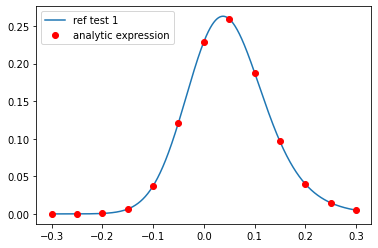

In [4]:
t_1_sample = np.linspace(-0.3, 0.3, 13)
gau_signal_1_tst = exp_conv_gau(t_1_sample, fwhm, 1/tau_1)

plt.plot(t_1, gau_signal_1_ref, label='ref test 1')
plt.plot(t_1_sample, gau_signal_1_tst, 'ro', label='analytic expression')
plt.legend()
plt.show()

In [5]:
%timeit convolve(gau_irf_1, decay_1, mode='same')

447 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
%timeit exp_conv_gau(t_1_sample, fwhm, 1/tau_1)

39.7 µs ± 874 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Analytic implementation matches to numerical one. Moreover it saves much more computation time (about ~12x), since numerial implementation need to compute convolution of tau/200 step state

### Test -2-

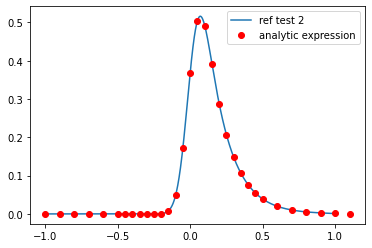

In [7]:
t_2_sample = np.hstack((np.arange(-1, -0.5, 0.1), np.arange(-0.5, 0.5, 0.05), np.arange(0.5, 1.1, 0.1)))
gau_signal_2_tst = exp_conv_gau(t_2_sample, fwhm, 1/tau_2)

plt.plot(t_2, gau_signal_2_ref, label='ref test 2')
plt.plot(t_2_sample, gau_signal_2_tst, 'ro', label='analytic expression')
plt.legend()
plt.show()

### Test -3-

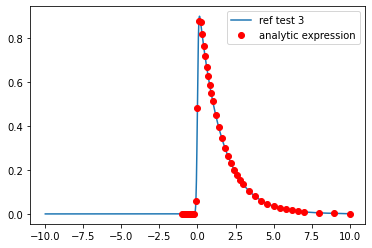

In [8]:
t_3_sample = np.hstack((np.arange(-1, 1, 0.1), np.arange(1, 3, 0.2), np.arange(3, 7, 0.4), np.arange(7, 11, 1)))
gau_signal_3_tst = exp_conv_gau(t_3_sample, fwhm, 1/tau_3)

plt.plot(t_3, gau_signal_3_ref, label='ref test 3')
plt.plot(t_3_sample, gau_signal_3_tst, 'ro', label='analytic expression')
plt.legend()
plt.show()

## ``exp_conv_cauchy``

Test condition.

1. fwhm = 0.15, tau = 0.05, time range [-1, 1]

2. fwhm = 0.15, tau = 0.15, time range [-1, 1]

3. fwhm = 0.15, tau = 1.5, time range [-10, 10]

In [9]:
fwhm = 0.15
tau_1 = 0.05
tau_2 = 0.15
tau_3 = 1.5

t_1 = np.linspace(-0.6, 0.6, 2001)
t_2 = np.linspace(-1, 1, 2001)
t_3 = np.linspace(-10, 10, 2001)

# To test exp_conv_cauchy routine, calculates convolution numerically
cauchy_irf_1 = cauchy_irf(t_1, fwhm)
cauchy_irf_2 = cauchy_irf(t_2, fwhm)
cauchy_irf_3 = cauchy_irf(t_3, fwhm)

decay_1 = decay(t_1, 1/tau_1)
decay_2 = decay(t_2, 1/tau_2)
decay_3 = decay(t_3, 1/tau_3)

cauchy_signal_1_ref = (t_1[-1]-t_1[0])/2001*convolve(cauchy_irf_1, decay_1, mode='same')
cauchy_signal_2_ref = (t_2[-1]-t_2[0])/2001*convolve(cauchy_irf_2, decay_2, mode='same')
cauchy_signal_3_ref = (t_3[-1]-t_3[0])/2001*convolve(cauchy_irf_3, decay_3, mode='same')

### Test -1-

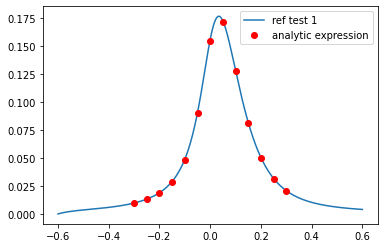

In [10]:
t_1_sample = np.linspace(-0.3, 0.3, 13)
cauchy_signal_1_tst = exp_conv_cauchy(t_1_sample, fwhm, 1/tau_1)

plt.plot(t_1, cauchy_signal_1_ref, label='ref test 1')
plt.plot(t_1_sample, cauchy_signal_1_tst, 'ro', label='analytic expression')
plt.legend()
plt.show()

In [11]:
%timeit convolve(cauchy_irf_1, decay_1, mode='same')

465 µs ± 18.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%timeit exp_conv_cauchy(t_1_sample, fwhm, 1/tau_1)

78.7 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Computation time for ``exp_conv_cauchy`` routine is about 2 times longer than ``exp_conv_gau`` routine. Because ``exp_conv_cauchy`` routine requires expansive exponential integral function

### Test -2-

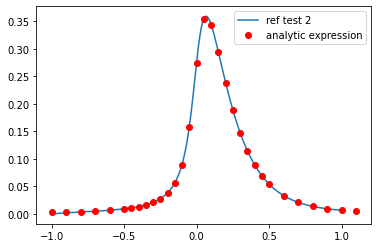

In [13]:
t_2_sample = np.hstack((np.arange(-1, -0.5, 0.1), np.arange(-0.5, 0.5, 0.05), np.arange(0.5, 1.1, 0.1)))
cauchy_signal_2_tst = exp_conv_cauchy(t_2_sample, fwhm, 1/tau_2)

plt.plot(t_2, cauchy_signal_2_ref, label='ref test 2')
plt.plot(t_2_sample, cauchy_signal_2_tst, 'ro', label='analytic expression')
plt.legend()
plt.show()

### Test -3-

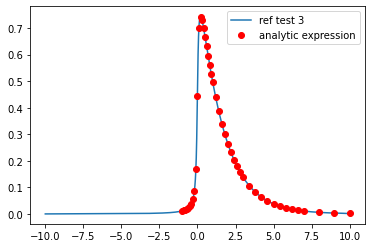

In [14]:
t_3_sample = np.hstack((np.arange(-1, 1, 0.1), np.arange(1, 3, 0.2), np.arange(3, 7, 0.4), np.arange(7, 11, 1)))
cauchy_signal_3_tst = exp_conv_cauchy(t_3_sample, fwhm, 1/tau_3)

plt.plot(t_3, cauchy_signal_3_ref, label='ref test 3')
plt.plot(t_3_sample, cauchy_signal_3_tst, 'ro', label='analytic expression')
plt.legend()
plt.show()

## ``dmp_osc_conv_gau``

Test condition.

1. fwhm = 0.15, tau = 10, T = 0.1, phase: 0, time range [-50, 50]
2. fwhm = 0.15, tau = 10, T = 0.5, phase: $\pi/4$, time range [-50, 50]
2. fwhm = 0.15, tau = 10, T = 3, phase: $\pi/2$, time range [-50, 50]

In [15]:
fwhm = 0.15
tau = 10
T_1 = 0.1
T_2 = 0.5
T_3 = 3
phi_1 = 0
phi_2 = np.pi/4
phi_3 = np.pi/2

t1 = np.linspace(-50, 50, 500001)
t2 = np.linspace(-50, 50, 100001)
t3 = np.linspace(-50, 50, 20001)
t_sample = np.hstack((np.arange(-1, 1, 0.02),np.arange(1, 3, 0.2), np.arange(3, 10, 0.4), np.arange(10, 20, 1), np.arange(20, 55, 5)))

# To test dmp_osc_conv_gau routine, calculates convolution numerically
gau_irf_1 = gau_irf(t1, fwhm)
gau_irf_2 = gau_irf(t2, fwhm)
gau_irf_3 = gau_irf(t3, fwhm)

dmp_osc_1 = dmp_osc(t1, 1/tau, T_1, phi_1)
dmp_osc_2 = dmp_osc(t2, 1/tau, T_2, phi_2)
dmp_osc_3 = dmp_osc(t3, 1/tau, T_3, phi_3)


dmp_osc_signal_1_ref = (t1[-1]-t1[0])/500001*convolve(gau_irf_1, dmp_osc_1, mode='same')
dmp_osc_signal_2_ref = (t2[-1]-t2[0])/100001*convolve(gau_irf_2, dmp_osc_2, mode='same')
dmp_osc_signal_3_ref = (t3[-1]-t3[0])/20001*convolve(gau_irf_3, dmp_osc_3, mode='same')

dmp_osc_signal_1_tst = dmp_osc_conv_gau(t_sample, fwhm, 1/tau, T_1, phi_1)
dmp_osc_signal_2_tst = dmp_osc_conv_gau(t_sample, fwhm, 1/tau, T_2, phi_2)
dmp_osc_signal_3_tst = dmp_osc_conv_gau(t_sample, fwhm, 1/tau, T_3, phi_3)

### Test -1-

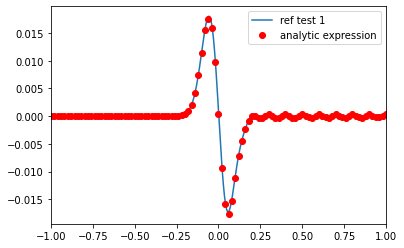

In [16]:
plt.plot(t1, dmp_osc_signal_1_ref, label='ref test 1')
plt.plot(t_sample, dmp_osc_signal_1_tst, 'ro', label='analytic expression')
plt.legend()
plt.xlim(-1, 1)
plt.show()

In [17]:
%timeit convolve(gau_irf_1, dmp_osc_1, mode='same')

104 ms ± 5.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit dmp_osc_conv_gau(t_sample, fwhm, 1/tau, T_1, phi_1)

91.4 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Analytic implementation matches to numerical one. Moreover it saves much more computation time, since numerical implementation need to compute convolution of 5000*tau/T points

### Test -2-

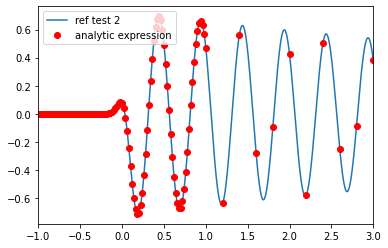

In [19]:
plt.plot(t2, dmp_osc_signal_2_ref, label='ref test 2')
plt.plot(t_sample, dmp_osc_signal_2_tst, 'ro', label='analytic expression')
plt.legend()
plt.xlim(-1, 3)
plt.show()

### Test -3-

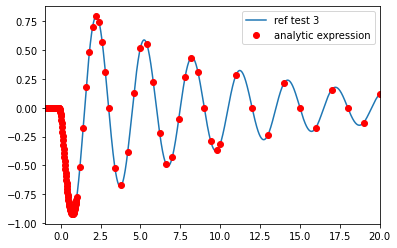

In [20]:
plt.plot(t3, dmp_osc_signal_3_ref, label='ref test 3')
plt.plot(t_sample, dmp_osc_signal_3_tst, 'ro', label='analytic expression')
plt.legend()
plt.xlim(-1, 20)
plt.show()

## ``dmp_osc_conv_cauchy``

Test condition.

1. fwhm = 0.15, tau = 10, T = 0.1, phase: 0, time range [-50, 50]
2. fwhm = 0.15, tau = 10, T = 0.5, phase: $\pi/4$, time range [-50, 50]
2. fwhm = 0.15, tau = 10, T = 3, phase: $\pi/2$, time range [-50, 50]

In [21]:
fwhm = 0.15
tau = 10
T_1 = 0.1
T_2 = 0.5
T_3 = 3
phi_1 = 0
phi_2 = np.pi/4
phi_3 = np.pi/2

t1 = np.linspace(-50, 50, 500001)
t2 = np.linspace(-50, 50, 100001)
t3 = np.linspace(-50, 50, 20001)
t_sample = np.hstack((np.arange(-1, 1, 0.02),np.arange(1, 3, 0.2), np.arange(3, 10, 0.4), np.arange(10, 20, 1), np.arange(20, 55, 5)))

# To test dmp_osc_conv_cauchy routine, calculates convolution numerically
cauchy_irf_1 = cauchy_irf(t1, fwhm)
cauchy_irf_2 = cauchy_irf(t2, fwhm)
cauchy_irf_3 = cauchy_irf(t3, fwhm)

dmp_osc_1 = dmp_osc(t1, 1/tau, T_1, phi_1)
dmp_osc_2 = dmp_osc(t2, 1/tau, T_2, phi_2)
dmp_osc_3 = dmp_osc(t3, 1/tau, T_3, phi_3)


dmp_osc_cauchy_signal_1_ref = (t1[-1]-t1[0])/500001*convolve(cauchy_irf_1, dmp_osc_1, mode='same')
dmp_osc_cauchy_signal_2_ref = (t2[-1]-t2[0])/100001*convolve(cauchy_irf_2, dmp_osc_2, mode='same')
dmp_osc_cauchy_signal_3_ref = (t3[-1]-t3[0])/20001*convolve(cauchy_irf_3, dmp_osc_3, mode='same')

dmp_osc_cauchy_signal_1_tst = dmp_osc_conv_cauchy(t_sample, fwhm, 1/tau, T_1, phi_1)
dmp_osc_cauchy_signal_2_tst = dmp_osc_conv_cauchy(t_sample, fwhm, 1/tau, T_2, phi_2)
dmp_osc_cauchy_signal_3_tst = dmp_osc_conv_cauchy(t_sample, fwhm, 1/tau, T_3, phi_3)

### Test -1-

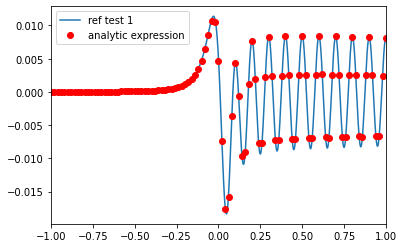

In [22]:
plt.plot(t1, dmp_osc_cauchy_signal_1_ref, label='ref test 1')
plt.plot(t_sample, dmp_osc_cauchy_signal_1_tst, 'ro', label='analytic expression')
plt.legend()
plt.xlim(-1, 1)
plt.show()

In [23]:
%timeit convolve(cauchy_irf_1, dmp_osc_1, mode='same')

105 ms ± 7.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit dmp_osc_conv_cauchy(t_sample, fwhm, 1/tau, T_1, phi_1)

646 µs ± 5.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


``dmp_osc_cauchy`` routine is 5-6 times slower than ``dmp_osc_gau`` routine due to the evaluation of expansive exponential integral function

### Test -2-

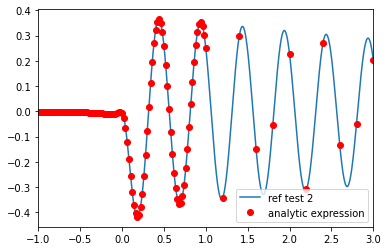

In [25]:
plt.plot(t2, dmp_osc_cauchy_signal_2_ref, label='ref test 2')
plt.plot(t_sample, dmp_osc_cauchy_signal_2_tst, 'ro', label='analytic expression')
plt.legend()
plt.xlim(-1, 3)
plt.show()

### Test -3-

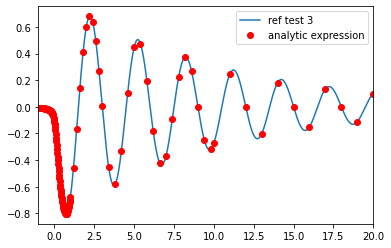

In [26]:
plt.plot(t3, dmp_osc_cauchy_signal_3_ref, label='ref test 3')
plt.plot(t_sample, dmp_osc_cauchy_signal_3_tst, 'ro', label='analytic expression')
plt.legend()
plt.xlim(-1, 20)
plt.show()